# 1. Creating Numpy arrays

Numpy has many different types of data "containers": lists, dictionaries, tuples etc. However none of them allows for efficient numerical calculation, in particular not in multi-dimensional cases (think e.g. of operations on images). Numpy has been developed exactly to fill this gap. It provides a new data structure, the **numpy array**, and a large library of operations that allow to:
- generate such arrays
- combine arrays in different ways (concatenation, stacking etc.)
- modify such arrays (projection, extraction of sub-arrays etc.)
- apply mathematical operations on them

Numpy is the base of almost the entire Python scientific programming stack. Many libraries build on top of Numpy, either by providing specialized functions to operate on them (e.g. scikit-image for image processing) or by creating more complex data containers on top of it. The data science library Pandas that will also be presented in this course is a good example of this with its dataframe structures.


In [1]:
import numpy as np

## 1.1 What is an array ?

Let us create the simplest example of an array by transforming a regular Python list into an array

In [2]:
mylist = [2,5,3,9,5,2]

In [3]:
mylist

[2, 5, 3, 9, 5, 2]

In [4]:
myarray = np.array(mylist)

In [5]:
myarray

array([2, 5, 3, 9, 5, 2])

In [6]:
type(myarray)

numpy.ndarray

### 1.1.1 Array Type

Just like when we create regular variables in Python, arrays receive a type when created. Unlike regular list, **all** elements of an array always have the same type. The type of an array can be recovered through the ```.dtype``` method:

In [7]:
myarray.dtype

dtype('int32')

Depending on the content of the list, the array will have different types. But the logic of "maximal complexity" is kept. For example if we mix integers and floats, we get a float array:

In [8]:
myarray2 = np.array([1.2, 6, 7.6, 5])
myarray2

array([1.2, 6. , 7.6, 5. ])

In [9]:
myarray2.dtype

dtype('float64')

In general, we have the possibility to assign a type to an array. This is true here, as well as later when we'll create more complex arrays, and is done via the ```dtype``` option:

In [10]:
myarray2 = np.array([1.2, 6, 7.6, 500], dtype=np.uint8)
myarray2

array([  1,   6,   7, 244], dtype=uint8)

The type of the array can also be changed after creation using the ```.astype()``` method:

In [11]:
myfloat_array = np.array([1.2, 6, 7.6, 500], dtype=np.float64)
myfloat_array.dtype

dtype('float64')

In [12]:
myint_array = myfloat_array.astype(np.int8)
myint_array.dtype

dtype('int8')

### 1.1.2 Array shape

A very important property of an array is its **shape** or in other words the dimensions of each axis. That property can be accessed via the ```.shape``` property:

In [13]:
myarray

array([2, 5, 3, 9, 5, 2])

In [14]:
myarray.transpose() #doesnt show any change as the transpose of a vector is a vector

array([2, 5, 3, 9, 5, 2])

kashyap ghimire

In [15]:
#if we want to change row array to column, then we need to add new axis

In [34]:
a1=myarray[np.newaxis].T
a1

array([[2],
       [5],
       [3],
       [9],
       [5],
       [2]])

In [35]:
myarray.shape

(6,)

In [36]:
a1.shape

(6, 1)

We see that our simple array has only one dimension of length 6. Now of course we can create more complex arrays. Let's create for example a *list of two lists*:

In [37]:
my2d_list = [[1,2,3], [4,5,6]]

my2d_array = np.array(my2d_list)
my2d_array

array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
my2d_array.shape

(2, 3)

## 1.2 Creating arrays

We have seen that we can turn regular lists into arrays. However this becomes quickly impractical for larger arrays. Numpy offers several functions to create particular arrays.

### 1.2.1 Common simple arrays
For example an array full of zeros or ones:

In [39]:
one_array = np.ones((2,3))
one_array

array([[1., 1., 1.],
       [1., 1., 1.]])

In [40]:
zero_array = np.zeros((2,3))
zero_array

array([[0., 0., 0.],
       [0., 0., 0.]])

One can also create diagonal matrix:

In [41]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

By default Numpy creates float arrays:

In [42]:
one_array.dtype

dtype('float64')

However as mentioned before, one can impose a type usine the ```dtype``` option:

In [45]:
one_array_int = np.ones((2,3), dtype=np.int8)
# or we can do (kashyap)
# one_array_int=np.ones((2,3), dtype='int8')
one_array_int

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [46]:
one_array_int.dtype

dtype('int8')

### 1.2.2 Copying the shape
Often one needs to create arrays of same shape. This can be done with "like-functions":

In [47]:
same_shape_array = np.zeros_like(one_array)
same_shape_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [48]:
one_array.shape

(2, 3)

In [49]:
same_shape_array.shape

(2, 3)

In [50]:
np.ones_like(one_array)

array([[1., 1., 1.],
       [1., 1., 1.]])

### 1.2.3 Complex arrays

We are not limited to create arrays containing ones or zeros. Very common operations involve e.g. the creation of arrays containing regularly arrange numbers. For example a "from-to-by-step" list:

In [51]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [52]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

Or equidistant numbers between boundaries:

In [64]:
np.linspace(0,2, 11)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

kashyap ghimire

In [69]:
# if we start from 0.2 to 2 then,
np.linspace(0.2,2,10) #aagadi ko element is included

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

Numpy offers in particular a ```random``` submodules that allows one to create arrays containing values from a wide array of distributions. For example, normally distributed:

In [70]:
normal_array = np.random.normal(loc=10, scale=2, size=(3,4))
normal_array

array([[ 5.14416243, 10.78515783, 11.63316475,  9.95013507],
       [12.05517819, 10.04372769, 10.98443157, 12.36777674],
       [ 9.89181684, 12.20332411, 11.42878071, 12.04674005]])

kashyap ghimire

In [72]:
import seaborn as sns

<Axes: ylabel='Density'>

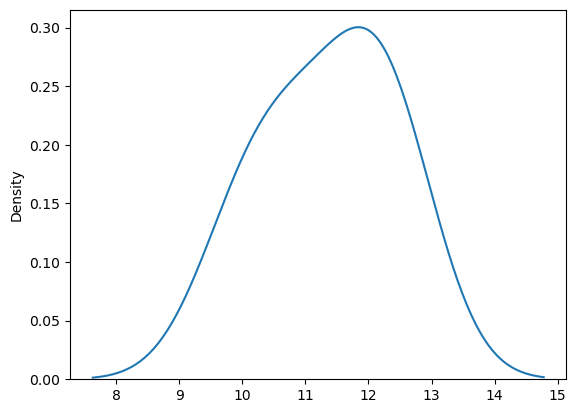

In [74]:
sns.kdeplot(normal_array[1])

In [76]:
standard=np.random.standard_normal(10)

<Axes: ylabel='Density'>

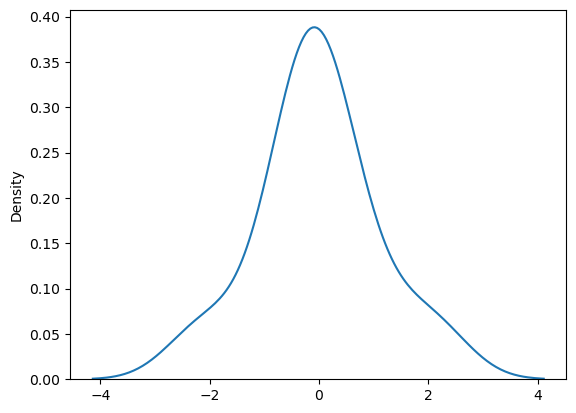

In [77]:
sns.kdeplot(standard)

In [78]:
np.random.poisson(lam=5, size=(3,4))

array([[6, 5, 3, 5],
       [5, 7, 5, 8],
       [3, 5, 6, 7]])

<Axes: ylabel='Density'>

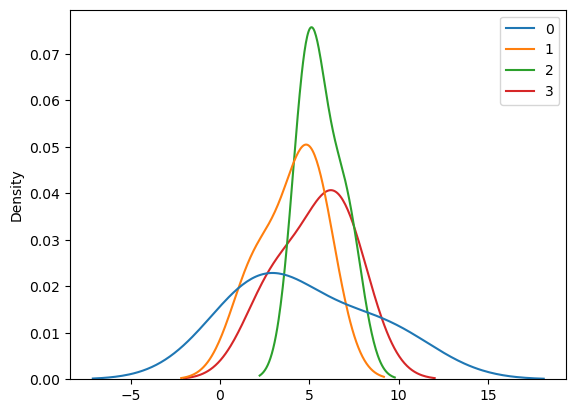

In [81]:
sns.kdeplot(np.random.poisson(lam=5, size=(3,4)))

## 1.3 Importing arrays

We have seen until now multiple ways to create arrays. However, most of the time, you will *import* data from some source, either directly as arrays or as lists, and use these data in your analysis.

### 1.3.1 Loading and saving arrays

Numpy can efficiently save and load arrays in its own format ```.npy```. Let's create an array and save it:

In [83]:
array_to_save = np.random.normal(10, 2, (4,5)) #mean,sd,shape
array_to_save

array([[12.6766835 , 10.25855897, 10.78810396, 11.35609101, 15.26999839],
       [ 8.91963074, 11.30580409,  6.30818673, 10.05223913, 13.52203444],
       [11.36087629,  5.19281173,  8.17763323, 11.24468314,  8.85064345],
       [ 8.84299262,  9.26414682, 10.09452577, 10.0977214 , 10.33000397]])

In [84]:
np.save('my_saved_array.npy', array_to_save)

In [85]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 4091-ACDB

 Directory of C:\Users\Kashyap Ghimire\Desktop\Tc internship\Week 1-python_basics_and_mlmath\ml-internship\week1

06/05/2024  11:18 AM    <DIR>          .
06/03/2024  12:07 PM    <DIR>          ..
06/05/2024  10:37 AM    <DIR>          .ipynb_checkpoints
06/05/2024  11:13 AM           160,374 01_Numpy_arrays_creation.ipynb
06/05/2024  10:34 AM             7,429 01_numpy_arrays_creation.py
06/05/2024  10:34 AM            28,244 02_Numpy_array_maths.ipynb
06/05/2024  10:34 AM             3,598 02_numpy_array_maths.py
06/05/2024  10:34 AM            39,743 03_Numpy_indexing.ipynb
06/05/2024  10:34 AM             6,631 03_numpy_indexing.py
06/05/2024  10:34 AM            14,831 04_Numpy_combining_arrays.ipynb
06/05/2024  10:34 AM             3,419 04_numpy_combining_arrays.py
06/03/2024  12:07 PM    <DIR>          images
06/03/2024  12:07 PM           766,646 Matrices.ipynb
06/05/2024  11:18 AM               288 my_saved

Now that this array is saved on disk, we can load it again using ```np.load```:

In [86]:
new_array = np.load('my_saved_array.npy')
new_array

array([[12.6766835 , 10.25855897, 10.78810396, 11.35609101, 15.26999839],
       [ 8.91963074, 11.30580409,  6.30818673, 10.05223913, 13.52203444],
       [11.36087629,  5.19281173,  8.17763323, 11.24468314,  8.85064345],
       [ 8.84299262,  9.26414682, 10.09452577, 10.0977214 , 10.33000397]])

If you have several arrays that belong together, you can also save them in a single file using ```np.savez``` in ```npz``` format. Let's create a second array:

In [87]:
array_to_save2 = np.random.normal(10, 2, (1,2))
array_to_save2

array([[10.12167671, 10.70255005]])

In [88]:
np.savez('multiple_arrays.npz', array_to_save=array_to_save, array_to_save2=array_to_save2)

In [89]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 4091-ACDB

 Directory of C:\Users\Kashyap Ghimire\Desktop\Tc internship\Week 1-python_basics_and_mlmath\ml-internship\week1

06/05/2024  11:18 AM    <DIR>          .
06/03/2024  12:07 PM    <DIR>          ..
06/05/2024  10:37 AM    <DIR>          .ipynb_checkpoints
06/05/2024  11:13 AM           160,374 01_Numpy_arrays_creation.ipynb
06/05/2024  10:34 AM             7,429 01_numpy_arrays_creation.py
06/05/2024  10:34 AM            28,244 02_Numpy_array_maths.ipynb
06/05/2024  10:34 AM             3,598 02_numpy_array_maths.py
06/05/2024  10:34 AM            39,743 03_Numpy_indexing.ipynb
06/05/2024  10:34 AM             6,631 03_numpy_indexing.py
06/05/2024  10:34 AM            14,831 04_Numpy_combining_arrays.ipynb
06/05/2024  10:34 AM             3,419 04_numpy_combining_arrays.py
06/03/2024  12:07 PM    <DIR>          images
06/03/2024  12:07 PM           766,646 Matrices.ipynb
06/05/2024  11:18 AM               716 multiple

And when we load it again:

In [90]:
load_multiple = np.load('multiple_arrays.npz')
type(load_multiple)

numpy.lib.npyio.NpzFile

We get here an ```NpzFile``` *object* from which we can read our data. Note that when we load an ```npz``` file, it is only loaded *lazily*, i.e. data are not actually read, but the content is parsed. This is very useful if you need to store large amounts of data but don't always need to re-load all of them. We can use methods to actually access the data:

In [94]:
load_multiple

In [95]:
load_multiple.files

['array_to_save', 'array_to_save2']

In [96]:
load_multiple.get('array_to_save2')

array([[10.12167671, 10.70255005]])

### 1.3.2 Importing data as arrays

Images are a typical example of data that are array-like (matrix of pixels) and that can be imported directly as arrays. Of course, each domain will have it's own *importing libraries*. For example in the area of imaging, the scikit-image package is one of the main libraries, and it offers and importer of images as arrays which works both with local files and web addresses:

In [97]:
import skimage.io

image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/f/fd/%27%C3%9Cbermut_Exub%C3%A9rance%27_by_Paul_Klee%2C_1939.jpg')

We can briefly explore that image:

In [98]:
type(image)

numpy.ndarray

In [47]:
image.dtype

dtype('uint8')

In [99]:
image.shape

(584, 756, 3)

We see that we have an array of integeres with 3 dimensions. Since we imported a jpg image, we know that the thrid dimension corresponds to three color channels Red, Green, Blue (RGB).

You can also read regular CSV files directly as Numpy arrays. This is more commonly done using Pandas, so we don't spend much time on this, but here is an example on importing data from the web:

In [101]:
oilprice = np.loadtxt('https://raw.githubusercontent.com/guiwitz/Rdatasets/master/csv/quantreg/gasprice.csv',
          delimiter=',', usecols=range(2,3), skiprows=1)

In [102]:
oilprice

array([126.6, 127.2, 132.1, 133.3, 133.9, 134.5, 133.9, 133.4, 132.8,
       132.3, 131.1, 134.1, 119.2, 116.8, 113.9, 110.6, 107.8, 105.4,
       102.5, 104.5, 104.3, 104.7, 105.2, 106.6, 106.9, 109. , 110.4,
       111.3, 112.1, 112.9, 114. , 113.8, 113.5, 112.6, 111.4, 110.4,
       109.8, 109.4, 109.1, 109.1, 109.9, 111.2, 112.4, 112.4, 112.7,
       112. , 111. , 109.7, 109.2, 108.9, 108.4, 108.8, 109.1, 109.1,
       110.2, 110.4, 109.9, 109.9, 109.1, 107.5, 106.3, 105.3, 104.2,
       102.6, 101.4, 100.6,  99.5, 100.4, 101.1, 101.4, 101.2, 101.3,
       101. , 101.5, 101.3, 102.6, 105.1, 105.8, 107.2, 108.9, 110.2,
       111.8, 112. , 112.8, 114.3, 115.1, 115.3, 114.9, 114.7, 113.9,
       113.2, 112.8, 112.6, 112.3, 111.6, 112.3, 112.1, 112.1, 112.4,
       112.3, 111.8, 111.5, 111.5, 111.3, 111.3, 112. , 112. , 111.2,
       110.6, 109.8, 108.9, 107.8, 107.4, 106.9, 106.5, 106.6, 106.1,
       105.5, 105.5, 106.2, 105.3, 104.7, 104.2, 104.8, 105.8, 105.6,
       105.7, 106.8,